## **Loca Como Tu Madre**

In [130]:
from IPython import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set()
import datetime
import nbformat
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode (connected = True )
import plotly.graph_objs as go
import plotly.offline as py
from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import locale
import plotly.io as pio
from datetime import date
import calendar

In [131]:
# 1) git log --pretty=format:%cI,%h,%an,%ae,%s > /home/claudio/@LCTM/commits_LCTM.csv
# 2) abrir excel e e na aba dados, importar o arquivo gerado pelo código acima


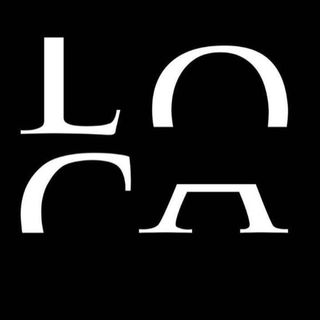

In [132]:
display.Image("/home/claudio/@LCTM/lctm001/lctm_logo.jpg",width=215)

In [133]:
# setar locale para português para que os dias da semana retornem em portugês no código abaixo.
locale.setlocale(locale.LC_ALL, 'pt_BR.utf-8')

# Importing each csv file and then joinning then, 
# as the files for other months are send by the client we can insert each one at the end of this code

df1 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_07.csv', encoding="ISO-8859-1", sep = ';')
df2 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_08.csv', encoding="ISO-8859-1", sep = ';')
df3 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_09.csv', encoding="ISO-8859-1", sep = ';')
df4 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_10.csv', encoding="ISO-8859-1", sep = ';')
df5 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_11.csv', encoding="ISO-8859-1", sep = ';')
df6 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2022_12.csv', encoding="ISO-8859-1", sep = ';')
df7 = pd.read_csv(r'/home/claudio/@LCTM/lctm001/2023_01.csv', encoding="ISO-8859-1", sep = ';')

In [134]:
transactions = pd.concat([df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [135]:
## DROPPING THE ROWS THAT ALL COLUMN VALUES ARE NULL
#  https://www.youtube.com/watch?v=uDr67HBIPz8&t=818s

transactions = transactions.dropna(how='all')

In [136]:
del transactions['Vr. Desconto']
del transactions['Valor Venda']
del transactions['Tx Serviço']
del transactions["Caixa"]
del transactions['Operador']
del transactions['Data Cancelamento']
del transactions['Operador Cancelamento']
del transactions['Operador Desconto']
del transactions['Operador Desc Repique']
del transactions['NRC']
del transactions['Comandas']
del transactions['Série NFCE']
del transactions['Série NFE']
del transactions['Integração']
del transactions['Observação']
del transactions['CO_CLIENTE']
del transactions['Atendente']
del transactions['IC_REVENDA']

In [137]:
# renomeei a coluna 'Tipo Operação' para 'venda'.
transactions.rename(columns = {'Tipo Operação':'venda'}, inplace = True)

In [138]:
# Pandas Drop Rows Based on Column Value
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/
transactions.drop(transactions[transactions['venda'] == 'CO_VENDA'].index, inplace = True)

In [139]:
# renomeei a coluna 'Cod Venda' para 'prim_col'.
transactions.rename(columns = {'Cod Venda':'prim_col'}, inplace = True)

In [140]:
# If 'prim_col' value is not empty, set the value of column 'venda' to the value of column 'prim_col', else value of column 'venda' stays the same
transactions['venda'] = transactions.apply(lambda row: row['prim_col'] if row['venda'] == 'LOCA' else row['venda'], axis=1)

# If 'prim_col' value is not empty, set the value of column 'venda' to the value of column 'prim_col', else value of column 'venda' stays the same
transactions['venda'] = transactions.apply(lambda row: row['prim_col'] if row['venda'] == 'Balcao' else row['venda'], axis=1)

# Vamos analisar cada parte dessa linha:
#transactions['venda']: Estamos nos referindo à coluna 'venda' do DataFrame transactions.
# Essa coluna será atualizada com base no resultado da operação que será realizada a seguir.
#transactions.apply(...): O método apply() é usado para aplicar uma função a todas as linhas 
# (ou colunas) de um DataFrame. Neste caso, a função está sendo aplicada às linhas, conforme
# especificado pelo argumento axis=1.
#lambda row: ...: Estamos usando uma função lambda, que é uma função anônima e de uso único.
# Essa função aceita um argumento chamado row, que representa uma linha do DataFrame transactions.
#row['prim_col'] if row['venda'] == 'LOCA' else row['venda']: Esta é a lógica da função lambda.
# Estamos usando uma expressão condicional para verificar se o valor da coluna 'venda' na
# linha atual (row['venda']) é igual a 'LOCA'. Se for verdade, o valor da coluna 'prim_col'
# na mesma linha (row['prim_col']) será usado como resultado. Caso contrário, o próprio valor da coluna 'venda' será mantido.

In [141]:
# Função para verificar se o valor é uma string e contém apenas letras, testando se o código da celula anterior funcionou
def is_string_with_letters(value):
    return isinstance(value, str) and value.isalpha()

# Aplicando o filtro para manter apenas as linhas onde o valor da coluna 'venda' é uma string e contém apenas letras
filtered_transactions = transactions[transactions['venda'].apply(is_string_with_letters)]

# filtered_transactions

In [142]:
# Função para verificar se o valor é uma data
def is_date(value):
    try:
        pd.to_datetime(value)
        return True
    except ValueError:
        return False

# Função para aplicar à coluna
def copy_date_or_set_nd(value):
    return value if is_date(value) else 'nd'

In [143]:
# Criar a nova coluna 'data_venda' aplicando a função copy_date_or_set_nd
transactions['data_venda'] = transactions['Data Venda'].apply(copy_date_or_set_nd)

In [144]:
# Criar a nova coluna 'data_recebimento' aplicando a função copy_date_or_set_nd
transactions['data_recebimento'] = transactions['Data Recebimento'].apply(copy_date_or_set_nd)

In [145]:
# Convert the "venda" variable from object type to integer type
transactions['venda'] = np.int64(transactions['venda'])

In [146]:
# Agrupar o DataFrame pela coluna 'venda'
grouped = transactions.groupby('venda')

# Para cada grupo, encontrar a primeira data na coluna "data_venda" e atualizar todas as linhas do grupo
for group_name, group_df in grouped:
    first_date = group_df['data_venda'].apply(is_date).idxmax()
    matching_date = transactions.loc[first_date, 'data_venda']
    
    transactions.loc[transactions['venda'] == group_name, 'data_venda'] = matching_date

In [147]:
# Agrupar o DataFrame pela coluna 'venda'
grouped = transactions.groupby('venda')

# Para cada grupo, encontrar a primeira data na coluna "data_recebimento" e atualizar todas as linhas do grupo
for group_name, group_df in grouped:
    first_date_recebimento = group_df['data_recebimento'].apply(is_date).idxmax()
    matching_date = transactions.loc[first_date_recebimento, 'data_recebimento']
    
    transactions.loc[transactions['venda'] == group_name, 'data_recebimento'] = matching_date

In [148]:
# Agrupando as linhas com base na coluna 'venda'
grouped_transactions = transactions.groupby('venda')

# Preenchendo os valores nulos na coluna 'Vendedor' com o primeiro valor não nulo encontrado dentro do grupo
transactions['Vendedor'] = grouped_transactions['Vendedor'].transform(lambda x: x.ffill().bfill())


In [149]:
# Deletando a primeira coluna, pois não será mais utilizada
del transactions['prim_col']

In [150]:
# Deletando linhas com valor NaN na coluna 'NFe'
transactions = transactions.dropna(subset=['NFe'])

In [151]:
# Renomeando várias colunas
transactions = transactions.rename(columns={
    'NFe': 'cod_produto',
    'NFCe': 'produto',
    'Data Venda': 'quantidade',
    'Data Recebimento' : 'valor_unit',
    'Nome Cliente': 'total_item',
    'Valor Recebido': 'data_lanc',
    'Operação': 'atendente',
    'Vendedor': 'vendedor'
})

In [152]:
# Aplicando o filtro para marcar as linhas onde o valor da coluna 'quantidade' é igual a uma data
filtered_transactions_quantidade= transactions[transactions['quantidade'].apply(is_date)]
# depois quero deletar essa linha filtrada
transactions.drop(filtered_transactions_quantidade.index, inplace=True)

### Mostrando se houveram eventos Corporativos

In [153]:
# Detectando Eventos Corporativos, nesse tipo de registro teremos um valor para a variável atendente = NaN
#linhas_com_valores_em_branco = transactions[transactions.isnull().any(axis=1)]
#linhas_com_valores_em_branco

In [154]:
# depois quero deletar essa linha filtrada de eventos corporativos
# transactions.drop(linhas_com_valores_em_branco.index, inplace=True)

In [155]:
# Fazendo algumas conversôes

In [156]:
# Convert coluna "quantidade" variable from object type to integer type
transactions['quantidade'] = np.int64(transactions['quantidade'])

In [157]:
# change the decimal separator of the the variable "valor_unit" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['valor_unit'] = transactions['valor_unit'].str.replace(",",".")
transactions['valor_unit'] = transactions['valor_unit'].astype(float)

In [158]:
# change the decimal separator of the the variable "valor_unit" from "," to "."
# https://cursos.alura.com.br/forum/topico-transformar-pontos-por-virgulas-dentro-de-um-dataframe-121090
transactions['total_item'] = transactions['total_item'].str.replace(",",".")
transactions['total_item'] = transactions['total_item'].astype(float)

In [159]:
transactions['data_lanc'] = pd.to_datetime(transactions['data_lanc'], format='%d/%m/%Y %H:%M:%S')

In [160]:
transactions['data_venda'] = pd.to_datetime(transactions['data_venda'], format='%d/%m/%Y %H:%M:%S')

In [161]:
transactions['data_recebimento'] = pd.to_datetime(transactions['data_recebimento'], format='%d/%m/%Y %H:%M:%S')

## Criação de colunas para facilitar a análise

In [162]:
# Creating a horario column that is a copy of data_hora and coverting it to datetime and extracting only the day;
transactions['data'] = (transactions['data_lanc'])
transactions['data'] = transactions['data'].dt.date

In [163]:
# add hora and minuto column; using class attributes .hour and .minute

transactions['hora'] = transactions.data_lanc.dt.hour
transactions['minuto'] = transactions.data_lanc.dt.minute

In [164]:
transactions['hora_minuto']=pd.to_datetime(transactions['data_lanc'])

transactions['hora_minuto'] = transactions['hora_minuto'].dt.time

In [165]:
# ### Extracting only the Date from 'data_lanc' column as Datetime format
transactions['data_normal'] = transactions['data_lanc'].dt.normalize()

In [166]:
# Definindo a função time_of_day
def time_of_day(hora):
    """
    Determina se a  compra foi feita pela manhã, tarde ou noite.
    """
    
    if hora < 12:
        
        return 'manhã'
    
    elif hora < 17:
        
        return 'tarde'
    
    else:
        
        return 'noite'
    
transactions['periodo_do_dia'] = transactions.hora.apply(time_of_day)

In [167]:
# Add a day of week variable and a second classifier of weekday or weekend
transactions['dia_da_semana'] = [calendar.day_name[i.weekday()] for i in transactions['data_lanc']]

In [168]:
# Add a tipo_de_dia variable (FS= final de semana or DU=  dia útil)
transactions['tipo_de_dia'] = ['FS' if (i == 'domingo') | (i == 'sábado') else 'DU' for i in 
                                                                            transactions['dia_da_semana']]

## Verificando divergência dos dados

In [169]:
# Verificando se o valor "total_item" é igual a: "quantidade" * "valor_unit"

transactions["total_item_verif"] = transactions['quantidade']* transactions['valor_unit']

In [170]:
# Continuando o item anterior
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

transactions['confirm'] = np.where(transactions['total_item'] > transactions['total_item_verif'], True, False)

In [171]:
#### Creating a Column diference
transactions['diference']=(transactions['total_item'])-(transactions['total_item_verif'])

In [172]:
# continuando o item anterior
resumo = transactions.loc[transactions["confirm"] == True, ["total_item", "total_item_verif", 'diference']].sum()

print (resumo)

total_item          0.0
total_item_verif    0.0
diference           0.0
dtype: float64


In [173]:
faturamaneto = transactions['total_item'].sum()
print(faturamaneto)

884024.3999999999


Não encontramos nenhuma divergência entre os valores ao efetuarmos a multiplicação do valor de venda do item por sua quantidade, e compararmos com o valor expresso na coluna "total_item", não encontramos nenhuma divergência, o valor dessa diferença é zero.

> # **Exploração dos Dados**

In [188]:
# Find Unique Values of each item sold in the Column "produto"
# https://www.statology.org/pandas-unique-values-in-column/
# Pandas: get first 10 elements of a series
top_produtos = transactions.produto.value_counts()
print (top_produtos[:20])

COUVERT LOCA              4611
HEINEKEN LONG NECK        3587
CANECA CHOPP LAGER        2308
AGUA SEM GAS              1919
COUVERT LOCA JAMPA        1828
BOLINHO ACOSTELADO        1031
CANECA CHOPP IPA          1018
SOL LN                     962
APEROL SPRITZ              831
AGUA COM GÁS               784
COCA COLA KS 290ML         769
LOCA BURGUER               543
LOCA PINK                  530
SANGRIA HP                 492
CAIPIRINHA                 433
MOSCOW MULE                432
SODA ITALIANA              412
CAIPIROSCA                 412
CRISPY CHICKEN BURGUER     405
CAIPIROSCA FRUTA           402
Name: produto, dtype: int64


### Observações
Alguns itens chamaram minha atenção:

Eventos: foram identificados 7 registros de eventos. No entanto, como não conseguimos determinar quais itens foram vendidos nessas ocasiões, optamos por excluí-los da análise. Considerando que o escopo do trabalho é analisar os produtos vendidos, horário e dia, bem como sua quantidade, fica inviável realizar um estudo sem essas informações;

Couvert artístico: seria interessante obter informações sobre os artistas que se apresentaram nesses horários, pois poderíamos investigar quais deles atraem um público maior e que permanece mais tempo no estabelecimento;

Os dados também apresentaram dois tipos de entrada que não estão especificadas: "item extra" (73 registros) e "porção extra" (36 registros). Portanto, esses registros também serão retirados da análise.

In [ ]:
# dropping the rows as explain above.

# Pandas Drop Rows Based on Column Value
# https://sparkbyexamples.com/pandas/pandas-delete-rows-based-on-column-value/

array= ['EVENTO.', 'EVENTO', 'PORÇAO EXTRA', "ITEM EXTRA", 'EVENTO CORPORATIVO' ]
transactions.drop(transactions[transactions.produto.isin(array)].index, inplace = True)

In [179]:
### Converting a Series to a dataframe and changing the namee of the column
top_produtos_df = top_produtos.to_frame().reset_index()
top_produtos_df.rename(columns = {'produto':'quantidade', 'index':'produto'}, inplace = True)

In [183]:
### Gráfico 01

fig_top_produtos = go.Figure(data=[go.Table(
    header=dict(values=list(top_produtos_df.columns),
                font=dict(color='white', size=12), # configurando a cor e tamanho da letra
                fill_color='black',
                align='left'),
    cells=dict(values=[top_produtos_df['produto'], top_produtos_df['quantidade'] ],
               font=dict(color='white', size=12),
               fill_color='gray',
               align='left'))
])


fig_top_produtos.update_layout(
    title={
        'text': "Produtos mais vendidos - (Jul 2022 - Jan 23)",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

py.iplot(fig_top_produtos)

## Algumas métricas importantes

Após a filtragem dos regitros conforme a explicação acima, teos algumas métricas para apresentar:

In [193]:
faturamento_sem_eventos= transactions['total_item'].sum().round(decimals = 2)
print('O faturamento desconsiderando-se os eventos no período foi de:', faturamento_sem_eventos)

O faturamento desconsiderando-se os eventos no período foi de: 865321.6


In [190]:
## Get unique names in the "produto" column using Series.unique() 
## https://sparkbyexamples.com/pandas/pandas-count-unique-values-in-column/
num_itens_vend = transactions.produto.unique().size

print('O número de diferentes itens vendido pelo estabelecimento é:', num_itens_vend)

O número de diferentes itens vendido pelo estabelecimento é: 283


In [195]:
# achando a média do numero de itens vendidos por dia
grouped_by_date = pd.DataFrame(transactions.groupby(by='data_normal')['quantidade'].sum()).reset_index()
print('O número médio de itens vendidos em um dia é: \n{0}'.format(
    grouped_by_date.quantidade.mean().round(decimals = 2)))

O número médio de itens vendidos em um dia é: 
226.58


In [196]:
# Look at the average number of items purchased...

avg_items = transactions.groupby(by='venda')['produto'].count().mean()

print('A média de itens por venda é: %.2f itens' %avg_items)

A média de itens por venda é: 8.60 itens


In [199]:
# ...and how that varies by time of day

single_transaction = pd.DataFrame(transactions.groupby(by='venda')['quantidade'].sum())

single_transaction = single_transaction.merge(transactions[['hora','minuto','periodo_do_dia','data_normal', 'venda']]\
                                              .drop_duplicates('venda'), left_on=single_transaction.index, 
                                              right_on='venda', how='left', copy=False)

st01 = single_transaction.groupby(by='periodo_do_dia')['quantidade'].mean().round (decimals=2)
st01 = st01.to_frame().reset_index()
st01.rename(columns = {'periodo_do_dia':'Período', 'quantidade':'Média'}, inplace = True)

print('A média de itens por venda e por período do dia é: \n{0}'.format(st01.sort_values(by=['Média'],ascending=False)))

A média de itens por venda e por período do dia é: 
  Período  Média
2   tarde  11.29
1   noite   8.59
0   manhã   2.99


In [200]:
# GRAFICO 07
# Creating a table and an animated frequencie line

 <h2> Quantidade de itens vendidos por dia ao longo do ano</h2>

In [ ]:
# Sales trend by date
# https://www.youtube.com/watch?v=Xjm7fOw6gjY
# use reset index for transforming the data in a variable not a index

grouped_by_date = pd.DataFrame(transactions.groupby(by=['data_normal','dia_da_semana'])['quantidade'].sum().reset_index())

vendas = px.line(grouped_by_date, x = 'data_normal', y = 'quantidade', hover_data=["dia_da_semana"],
                 title = 'Itens vendidos por dia - Jul/22 a Jan/23', labels= {'item_count' : 'Quantidade','horario': 'Data'})

# update line color
vendas.update_traces(line_color='seagreen')

# update backgournd
vendas.update_layout(
    plot_bgcolor='lightcyan', 
    xaxis =dict(mirror=True,
    ticks='outside', showline=True, linecolor='black', gridcolor='lightcyan'),
    yaxis =dict(mirror=True, ticks='outside', showline=True, linecolor='black', gridcolor='lightcyan')
)

# adicionando anaotação
# https://plotly.com/python/styling-plotly-express/
vendas.add_annotation( # add a text callout with arrow
    text="Vendas muito acima do padrão, dia 23 de Junho", x="2022-06-23", y=2300, arrowhead=1, showarrow=True
)

vendas.add_annotation( # add a text callout with arrow
    text="Não foram informadas vendas <br /> entre 12 e 26 de Julho e<br /> houve um pico de vendas<br /> no dia 30 de Julho", 
    x="2022-07-20", y=500, arrowhead=1, showarrow=True)



py.iplot(vendas, config={'locale': 'pt-BR'}, filename='/home/claudio/results/grafico07 - Vendas_por_dia_linha.html')